# Homework #5:
## 8.5 Fitting
|Author| Stanley A. Baronett|
|--|-------------------------------|
|Created | 9/27/19|
|Updated | 9/27/19|

### Mercury (Hg) Emission Lines from Grating Spectrometer
The following data come from measurements taken using a transmission grating spectrometer and a low-pressure mercury lamp source. The data consists of ordered pairs of a reference wavelength $\lambda$ times its diffraction order $m$, measured in angstroms ($\unicode[serif]{xC5} = \textrm{m} \times 10^{-10}$), and the corresponding observed angle of diffraction $\theta_\Delta$ measured in degrees, i.e.,

$$ (m\lambda, \theta_\Delta). $$

The data is expected to follow the ___grating equation___ as

\begin{equation*}
    m\lambda = d[\sin\theta_i - \sin(\theta_\Delta - \theta_i)],
    \tag{1}
\end{equation*}

where $d$ is the grating spacing, and $\theta_i$ is the angle of incidence (i.e., incident light on grating measured with respect to normal).

In this notebook, we will fit various types of curves to the data, analyze and compare their differences.

#### 1. Import and Store Data
First let's import the spectral data from a comma-separated values (.csv) file.

In [29]:
import os

# set the working dir to hw05
os.chdir("/hw05")
os.getcwd()

'/home/stanley/phys300/2017-cmp/homework/hw05'

In [148]:
import numpy as np

# import data into numpy array of order of known wavelength
# (m*lambda) and observed angle in degrees (theta_Delta) from 
# grating spectrometer
spectral_data = np.loadtxt(fname = "data_deg.csv", delimiter=',')
print(spectral_data)

[[ 4.046560e+03  4.358330e+03  4.916070e+03  5.460740e+03  5.769600e+03
   5.790660e+03  8.093120e+03  8.716660e+03  9.832140e+03  1.092148e+04
   1.153920e+04  1.158132e+04  1.213968e+04  1.307499e+04  1.474821e+04
  -4.046560e+03 -4.358330e+03 -4.916070e+03 -5.460740e+03 -5.769600e+03
  -5.790660e+03 -8.093120e+03 -8.716660e+03 -9.832140e+03 -1.092148e+04
  -1.153920e+04 -1.158132e+04 -1.213968e+04 -1.307499e+04 -1.474821e+04
  -1.638222e+04]
 [ 1.415000e+01  1.527500e+01  1.725830e+01  1.928330e+01  2.041670e+01
   2.050830e+01  2.935830e+01  3.186670e+01  3.656670e+01  4.148330e+01
   4.442500e+01  4.464170e+01  4.746670e+01  5.259170e+01  6.380830e+01
  -1.410830e+01 -1.521670e+01 -1.725830e+01 -1.919170e+01 -2.034170e+01
  -2.041670e+01 -2.912500e+01 -3.160000e+01 -3.622500e+01 -4.100830e+01
  -4.385000e+01 -4.405830e+01 -4.675000e+01 -5.167500e+01 -6.210000e+01
  -7.809170e+01]]


#### 2. Polynomial Curve Fitting
First we'll try three different polynomial fits of the spectral data using numpy's __polyfit__ function: linear, quadratic and cubic.

In [149]:
# store array indices in separate variables for easibility
x = spectral_data[1]
y = spectral_data[0]

# perform linear least-squares fits of orders 1 - 3
p1 = np.polyfit(x, y, 1, full=True)
p2 = np.polyfit(x, y, 2, full=True)
p3 = np.polyfit(x, y, 3, full=True)

# generate evenly spaced values across domain of data
# to later be plotted as a smooth line
x0 = np.linspace(-90, 90, 100)
y1 = np.polyval(p1[0], x0)
y2 = np.polyval(p2[0], x0)
y3 = np.polyval(p3[0], x0)

#### 3. Non-linear Curve Fitting
Next, we'll try a non-linear, least-squares fit of the data to the ___grating equation___ (Eq. 1).

In [152]:
from scipy.optimize import curve_fit

# define the grating eqation
f = lambda x, d,th_i: d*(np.sin(th_i) + np.sin(x - th_i))
d, th_i = 16666, np.radians(1) # provide some intial paramter values

# perform non-linear, least-squares fit of data
params, extras = curve_fit(f, np.radians(x), y)

#### 3. Comparison Plots
Now, we'll plot the data and the fits together to see how the curves fare.

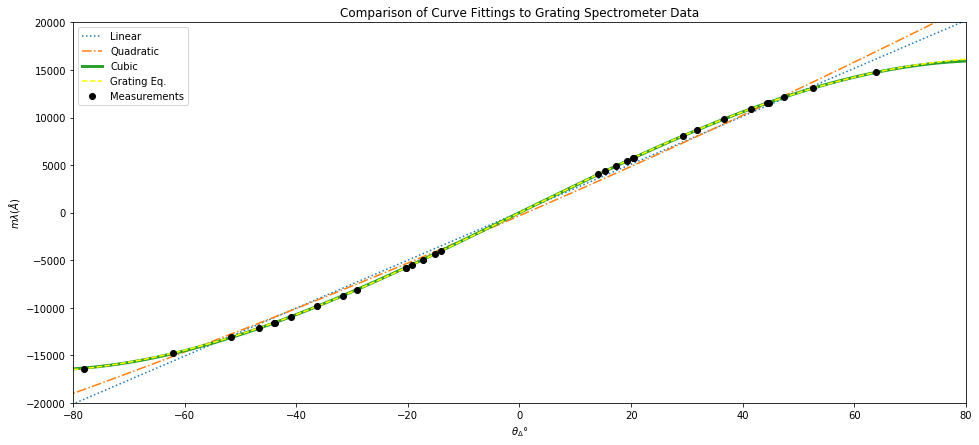

In [151]:
# plot data and curves
import matplotlib.pyplot as plt

plt.figure(figsize=[16, 7])
plt.title("Comparison of Curve Fittings to Grating Spectrometer Data")
plt.plot(x0, y1, ':', label="Linear")
plt.plot(x0, y2, '-.', label="Quadratic")
plt.plot(x0, y3, linewidth=3.0, label="Cubic")
plt.plot(x0, f(np.radians(x0), params[0], params[1]), '--', color='yellow', label="Grating Eq.")
plt.plot(x, y, 'o', color="black", label="Measurements")
plt.xlabel(r'$\theta_\Delta\degree$')
plt.xlim(-80, 80)
plt.ylim(-20000, 20000)
plt.ylabel('$m\lambda (\AA$)')
plt.legend(loc="best")
plt.show()

#### 4. Residuals Plot
From the graph above, it appears that _both_ the cubic polynomial and grating equation are good fits of the data. However, we can judge the adequacy of each better by plotting the ___residuals___, i.e., the deviations of the actual data from the curve fits. For a good fit, the scatter of data points should remain fairly close to the x-axis (i.e., a deviation of zero).

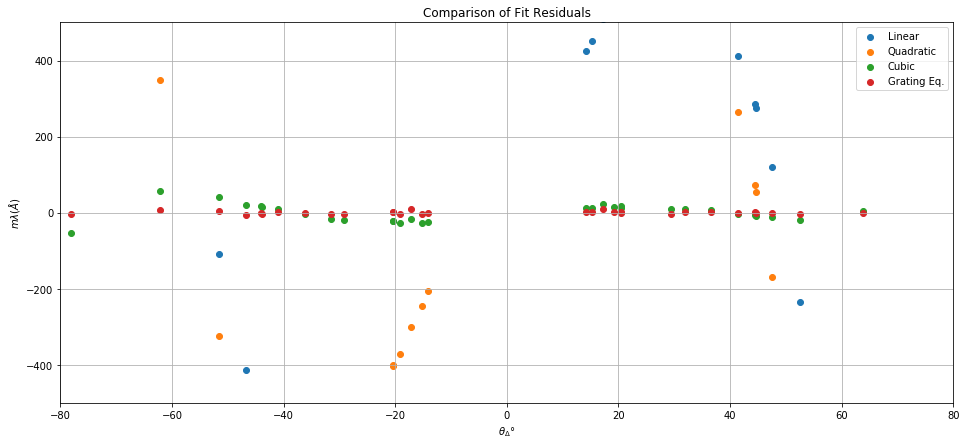

In [153]:
# evaluate each fit function at the observed points (theta_Delta)
f1 = np.polyval(p1[0], x)
f2 = np.polyval(p2[0], x)
f3 = np.polyval(p3[0], x)
fG = f(np.radians(x), params[0], params[1])

# calculate and store residuals of each fit
r1 = y - f1
r2 = y - f2
r3 = y - f3
rG = y - fG

# scatter plot residuals
plt.figure(figsize=[16, 7])
plt.title("Comparison of Fit Residuals")
plt.scatter(x, r1, label="Linear")
plt.scatter(x, r2, label="Quadratic")
plt.scatter(x, r3, label="Cubic")
plt.scatter(x, rG, label="Grating Eq.")
plt.grid()
plt.xlabel(r'$\theta_\Delta\degree$')
plt.xlim(-80, 80)
plt.ylim(-500, 500)
plt.ylabel('$m\lambda (\AA$)')
plt.legend(loc="best")
plt.show()

As we already suspected from the earlier graph, the linear and quadratic fits fare pretty poorly, with most of their residuals hundreds of angstroms away from the x-axis—many even outside the vertical range of the graph!

Now let's zoom in a take a closer look at just the cubic and grating equation fits...

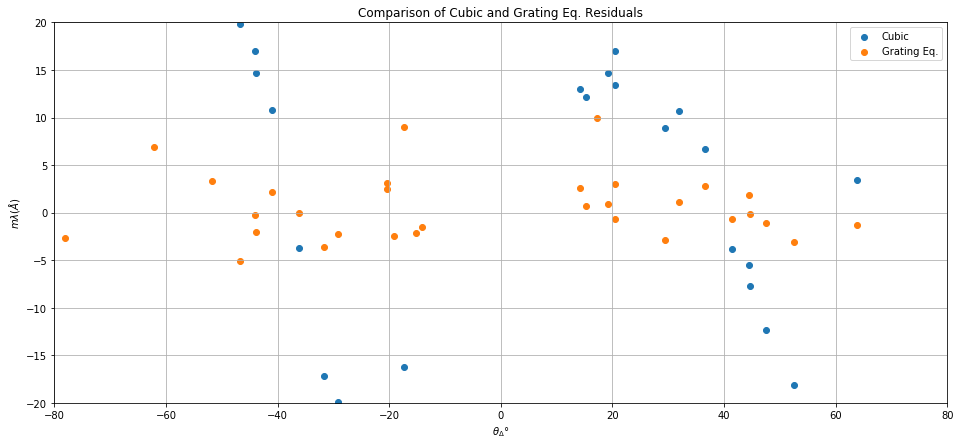

In [156]:
plt.figure(figsize=[16, 7])
plt.title("Comparison of Cubic and Grating Eq. Residuals")
plt.scatter(x, r3, label="Cubic")
plt.scatter(x, rG, label="Grating Eq.")
plt.grid()
plt.xlabel(r'$\theta_\Delta\degree$')
plt.xlim(-80, 80)
plt.ylim(-20, 20)
plt.ylabel('$m\lambda (\AA$)')
plt.legend(loc="best")
plt.show()

We can now see that just about all the residuals for the grating equation fall within 10 $\unicode[serif]{xC5}$ of the x-axis—most within 5$\unicode[serif]{xC5}$! In other words, the grating equation fitted curve comes within about 10$\unicode[serif]{xC5}$ of all the experimental data.

Meanwhile, despite how well it seemed to fit from the first graph, we see only a handful of residuals from the cubic fit fall within the same range—most fall more than 5$\unicode[serif]{xC5}$ away from the x-axis.

Thus, the grating equation is arguably more adequate than a cubic fit for the spectral data.